# Proyecto - Análisis de videojuegos para Tienda Ice

## Introducción <a class="anchor" id="Introducción"></a>


Para este proyecto se estará realizando el análisis para la tienda Ice la cual vende videojuegos. En particular, lo que se busca determinar si un videojuego tiene éxito o no. Para aquella tarea tenemos una base de datos que contiene las ventas hasta el año 2016.

Dentro de nuestra ejecución, se efectuará todo lo revisado y visto en los contenidos anteriores; manejo y preprocesamiento de datos (duplicados, ausentes, etc.) y posteriormente el proceso de ejecución del análisis (incluyendo formulación de hipótesis estadísticas).

## Inicialización <a class="anchor" id="Inicialización"></a>

En este apartado cargaremos todas las librerías requeridas para el proyecto.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

## Carga de Datos <a class="anchor" id="Carga-de-Datos"></a>

Acá realizaremos la carga del dataset necesario para iniciar nuestro trabajo.

In [2]:
df = pd.read_csv("/datasets/games.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Una primera mirada a los datos nos indican que de forma predeterminada viene separado por comas. Adicionalmente, mediante el metodo info vemos las columnas que posee y sus tipos. También, mediante el metodo head() se visualizan ya algunos elementos NaN en algunas de las columnas, por lo que tendremos que hacernos cargo de ello (dependiendo del objetivo que necesitemos).

Por otra parte, mediante el metodo describe obtenemos la visión general de los datos para sus respectivas estadísticas.

## Preparación de los Datos <a class="anchor" id="Carga-de-Datos"></a>


### Cambio a minusculas
Primero que todo pondremos los nombres de las columnas en minusculas. Esto, para que nos permita mejor manejo dentro de la utilización de las mismas dentro de nuestras operaciones en el análisis posterior.

In [5]:
df.columns = df.columns.str.lower() #señalamos que transforme todas las columnas a minusculas
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11277,Aibou DS,DS,2009.0,Adventure,0.0,0.0,0.08,0.0,NaN,NaN,NaN


### Tratado de valores ausentes y duplicados

Ahora, antes de realizar cualquier conversión de tipos en las columnas, debemos cerciorarnos que cada una de estas tenga coherencia en sus datos. Para ello, verificaremos sus duplicados y valores ausentes.

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Con el análisis de ausentes, tenemos algunas columnas donde existen muchos elementos sin información.

In [7]:
df[df["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Verificamos que hay 2 juegos sin nombre y 269 que no tienen su año de lanzamiento, pero también queremos cerciorarnos que no hayan juegos de nombre duplicados con los mismos datos, así que revisaremos aquello de igual manera.

In [8]:
df["name"].value_counts()

Need for Speed: Most Wanted                                   12
FIFA 14                                                        9
LEGO Marvel Super Heroes                                       9
Ratatouille                                                    9
Madden NFL 07                                                  9
                                                              ..
Ecco the Dolphin: Defender of the Future                       1
Ski Region Simulator                                           1
Mana Khemia: Student Alliance                                  1
Wild Wild Racing                                               1
Star Driver: Kagayaki no Takuto - Ginga Bishounen Densetsu     1
Name: name, Length: 11559, dtype: int64

In [9]:
df[df["name"] == "Need for Speed: Most Wanted"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [10]:
df[df["name"] == "Ratatouille"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65.0,8,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64.0,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55.0,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62.0,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56.0,tbd,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,tbd,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60.0,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,NaN,7.9,E


In [11]:
df[df["name"] == "FIFA 14"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


En general, una mirada parcial nos indica que los nombres de juegos duplicados encontrados al momento se justifican ya que son lanzados en diferentes consolas y/o años.

In [12]:
df.duplicated().sum()

0

Inicialmente no contaríamos con filas exactamente iguales.

Para el tratamiento de los valores ausentes, comenzaremos con los elementos que tienen ausente el año de lanzamiento. Para ello, buscaremos datos que nos aporten aquel valor, por ejemplo el mismo nombre del juego (FIFA 2014, quiere decir que se liberó el año anterior), por otro lado podemos filtrar el dataset por aquel nombre de juego y ver si en otra consola si se añadio aquel dato.

In [13]:
df[df["name"] == "Madden NFL 2004"] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


En el primer caso encontramos que el juego Madden NFL 2004 para PS2 no tiene su año de lanzamiento, pero en otras consolas sí, por lo que se cambiará aquel valor al mismo. El mismo análisis será análogo a los otros juegos, por lo que se hará de la misma manera.

Para los juegos que no se encontró la fecha de lanzamiento ya que son únicos en su categoría, se busco la fecha de lanzamiento en internet y se agregó como dato adicional.

In [14]:
df.loc[183, "year_of_release"] = 2003
df.loc[377, "year_of_release"] = 2003
df.loc[456, "year_of_release"] = 2008
df.loc[1538, "year_of_release"] = 2008
df.loc[475, "year_of_release"] = 2005
df.loc[609, "year_of_release"] = 1978
df.loc[15953, "year_of_release"] = 2008
df.loc[16373, "year_of_release"] = 2008
df.loc[16405, "year_of_release"] = 2003
df.loc[16448, "year_of_release"] = 2012
df.loc[16458, "year_of_release"] = 2008
df.loc[15754, "year_of_release"] = 2004
df.loc[16522, "year_of_release"] = 2004
df.loc[627, "year_of_release"] = 2007
df.loc[805, "year_of_release"] = 2007
df.loc[1142, "year_of_release"] = 2007
df.loc[1840, "year_of_release"] = 2007
df.loc[657, "year_of_release"] = 2001
df.loc[df["name"] == "LEGO Harry Potter: Years 5-7", "year_of_release"] = 2012
df.loc[df["name"] == "Happy Feet Two", "year_of_release"] = 2011
df.loc[df["name"] == "Test Drive Unlimited 2", "year_of_release"] = 2011
df.loc[df["name"] == "WRC: FIA World Rally Championship", "year_of_release"] = 2005
df.loc[df["name"] == "Bejeweled 3", "year_of_release"] = 2010
df.loc[df["name"] == "NBA Live 2003", "year_of_release"] = 2002
df.loc[df["name"] == "Rock Revolution", "year_of_release"] = 2008
df.loc[df["name"] == "The Lord of the Rings: War in the North", "year_of_release"] = 2011
df.loc[df["name"] == "Singularity", "year_of_release"] = 2010
df.loc[df["name"] == "Backbreaker", "year_of_release"] = 2009
df.loc[df["name"] == "Port Royale 2", "year_of_release"] = 2012
df.loc[df["name"] == "Combat Elite: WWII Paratroopers", "year_of_release"] = 2005
df.loc[df["name"] == "The Daring Game for Girls", "year_of_release"] = 2009
df.loc[df["name"] == "GRID", "year_of_release"] = 2008
df.loc[df["name"] == "Battle vs. Chess", "year_of_release"] = 2011
df.loc[df["name"] == "Metal Gear Solid 2: Substance", "year_of_release"] = 2002
df.loc[df["name"] == "Silent Hill: Homecoming", "year_of_release"] = 2008
df.loc[df["name"] == "Captain America: Super Soldier", "year_of_release"] = 2011
df.loc[df["name"] == "Robert Ludlum's The Bourne Conspiracy", "year_of_release"] = 2008
df.loc[df["name"] == "Port Royale 3", "year_of_release"] = 2012
df.loc[df["name"] == "The Chronicles of Narnia: The Lion, The Witch and The Wardrobe", "year_of_release"] = 2005
df.loc[df["name"] == "The Chronicles of Narnia: The Lion, The Witch and The Wardrobe", "year_of_release"] = 2005
df.loc[11832, "year_of_release"] = 2000
df.loc[df["name"] == "All-Star Baseball 2005", "year_of_release"] = 2004
df.loc[df["name"] == "The Golden Compass", "year_of_release"] = 2007
df.loc[df["name"] == "RollerCoaster Tycoon", "year_of_release"] = 2003
df.loc[df["name"] == "World of Tanks", "year_of_release"] = 2011
df.loc[df["name"] == "Tony Hawk's Downhill Jam", "year_of_release"] = 2006
df.loc[df["name"] == "Tropico 4", "year_of_release"] = 2011
df.loc[df["name"] == "Nintendo Puzzle Collection", "year_of_release"] = 2003
df.loc[df["name"] == "National Geographic Challenge!", "year_of_release"] = 2011
df.loc[df["name"] == "Aquaman: Battle for Atlantis", "year_of_release"] = 2003
df.loc[12217, "year_of_release"] = 2001
df.loc[14449, "year_of_release"] = 2010
df.loc[7848, "year_of_release"] = 2011
df.loc[16348, "year_of_release"] = 2010
df.loc[14769, "year_of_release"] = 2003
df.loc[1585, "year_of_release"] = 1977
df.loc[7406, "year_of_release"] = 2011
df.loc[df["name"] == "Def Jam: Fight for NY", "year_of_release"] = 2004
df.loc[15081, "year_of_release"] = 2002
df.loc[11790, "year_of_release"] = 2009
df.loc[10764, "year_of_release"] = 2008
df.loc[6266, "year_of_release"] = 1977
df.loc[df["name"] == "Shrek the Third", "year_of_release"] = 2007
df.loc[15022, "year_of_release"] = 2011
df.loc[8884, "year_of_release"] = 2002
df.loc[1506, "year_of_release"] = 1980
df.loc[9293, "year_of_release"] = 2005
df.loc[10486, "year_of_release"] = 2006
df.loc[8547, "year_of_release"] = 2001
df.loc[14950, "year_of_release"] = 2012
df.loc[df["name"] == "Dead Island: Riptide", "year_of_release"] = 2013
df.loc[df["name"] == "Luxor: Pharaoh's Challenge", "year_of_release"] = 2007
df.loc[13195, "year_of_release"] = 2011
df.loc[8632, "year_of_release"] = 2009
df.loc[df["name"] == "Madden NFL 2002", "year_of_release"] = 2001
df.loc[df["name"] == "Without Warning", "year_of_release"] = 2005
df.loc[2010, "year_of_release"] = 1997
df.loc[15998, "year_of_release"] = 2007
df.loc[15119, "year_of_release"] = 2009
df.loc[12003, "year_of_release"] = 2008
df.loc[df["name"] == "Star Trek: Conquest", "year_of_release"] = 2007
df.loc[df["name"] == "NHL Hitz Pro", "year_of_release"] = 2003
df.loc[df["name"] == "James Cameron's Dark Angel", "year_of_release"] = 2002
df.loc[15795, "year_of_release"] = 2007
df.loc[2106, "year_of_release"] = 1977
df.loc[4437, "year_of_release"] = 1978
df.loc[16288, "year_of_release"] = 2009
df.loc[6624, "year_of_release"] = 2005
df.loc[4648, "year_of_release"] = 2011
df.loc[12784, "year_of_release"] = 2006
df.loc[df["name"] == "Runaway: A Twist of Fate", "year_of_release"] = 2009
df.loc[11455, "year_of_release"] = 2011
df.loc[7354, "year_of_release"] = 1978
df.loc[15292, "year_of_release"] = 2008
df.loc[4775, "year_of_release"] = 2002
df.loc[2157, "year_of_release"] = 2003
df.loc[df["name"] == "Teen Titans", "year_of_release"] = 2006
df.loc[df["name"] == "Record of Agarest War Zero", "year_of_release"] = 2010
df.loc[8680, "year_of_release"] = 2011
df.loc[df["name"] == "Star Trek: Legacy", "year_of_release"] = 2006
df.loc[df["name"] == "Pac-Man Fever", "year_of_release"] = 2001
df.loc[1984, "year_of_release"] = 1999
df.loc[9119, "year_of_release"] = 2009
df.loc[df["name"] == "Transworld Surf", "year_of_release"] = 2002
df.loc[9761, "year_of_release"] = 2006
df.loc[7387, "year_of_release"] = 2013
df.loc[16277, "year_of_release"] = 2015
df.loc[14105, "year_of_release"] = 2011
df.loc[12880, "year_of_release"] = 2012
df.loc[12568, "year_of_release"] = 2008
df.loc[8364, "year_of_release"] = 2002
df.loc[df["name"] == "Samurai Shodown Anthology", "year_of_release"] = 2008
df.loc[11957, "year_of_release"] = 2011
df.loc[6255, "year_of_release"] = 2004
df.loc[6133, "year_of_release"] = 2005
df.loc[10837, "year_of_release"] = 2005
df.loc[10612, "year_of_release"] = 2009
df.loc[2169, "year_of_release"] = 2010
df.loc[11338, "year_of_release"] = 2009
df.loc[2108, "year_of_release"] = 2002
df.loc[df["name"] == "BioShock 2", "year_of_release"] = 2010
df.loc[14350, "year_of_release"] = 2007
df.loc[16080, "year_of_release"] = 2010
df.loc[13929, "year_of_release"] = 2006
df.loc[2281, "year_of_release"] = 2001
df.loc[9664, "year_of_release"] = 2009
df.loc[df["name"] == "MLB SlugFest 20-03", "year_of_release"] = 2002
df.loc[df["name"] == "NASCAR: Dirt to Daytona", "year_of_release"] = 2002
df.loc[1301, "year_of_release"] = 1998
df.loc[12970, "year_of_release"] = 2005
df.loc[11943, "year_of_release"] = 2011
df.loc[df["name"] == "NASCAR Thunder 2003", "year_of_release"] = 2002
df.loc[15557, "year_of_release"] = 2009
df.loc[14210, "year_of_release"] = 2004
df.loc[df["name"] == "NBA Starting Five", "year_of_release"] = 2002
df.loc[df["name"] == "Final Fantasy XI", "year_of_release"] = 2006
df.loc[4635, "year_of_release"] = 2010
df.loc[4220, "year_of_release"] = 1980
df.loc[df["name"] == "AKB1/48: Idol to Guam de Koishitara...", "year_of_release"] = 2011
df.loc[5041, "year_of_release"] = 1978
df.loc[14931, "year_of_release"] = 2004
df.loc[14597, "year_of_release"] = 2005
df.loc[df["name"] == "Street Hoops", "year_of_release"] = 2002
df.loc[13289, "year_of_release"] = 2010
df.loc[df["name"] == "Dance! It's Your Stage", "year_of_release"] = 2011
df.loc[4848, "year_of_release"] = 2001
df.loc[14325, "year_of_release"] = 2012
df.loc[5857, "year_of_release"] = 2000
df.loc[8151, "year_of_release"] = 2011
df.loc[3289, "year_of_release"] = 2008
df.loc[7108, "year_of_release"] = 2010
df.loc[15006, "year_of_release"] = 2006
df.loc[3187, "year_of_release"] = 2006
df.loc[df["name"] == "Major League Baseball 2K6", "year_of_release"] = 2006
df.loc[df["name"] == "Disney's Chicken Little: Ace In Action", "year_of_release"] = 2006
df.loc[df["name"] == "Cabela's Alaskan Adventure", "year_of_release"] = 2006
df.loc[5492, "year_of_release"] = 1999
df.loc[df["name"] == "Splatterhouse", "year_of_release"] = 2010
df.loc[16017, "year_of_release"] = 2009
df.loc[15079, "year_of_release"] = 2006
df.loc[16079, "year_of_release"] = 2006
df.loc[df["name"] == "Majesty 2: The Fantasy Kingdom Sim", "year_of_release"] = 2009
df.loc[df["name"] == "Robotech: Battlecry", "year_of_release"] = 2002
df.loc[2773, "year_of_release"] = 2004
df.loc[8150, "year_of_release"] = 2001
df.loc[df["name"] == "Wet", "year_of_release"] = 2009
df.loc[df["name"] == "Street Fighter IV", "year_of_release"] = 2009
df.loc[12046, "year_of_release"] = 2003
df.loc[df["name"] == "Major League Baseball 2K8", "year_of_release"] = 2008
df.loc[14252, "year_of_release"] = 2007
df.loc[df["name"] == "NBA Street Vol. 2", "year_of_release"] = 2003
df.loc[6293, "year_of_release"] = 2008
df.loc[df["name"] == "Shaun White Snowboarding", "year_of_release"] = 2008
df.loc[df["name"] == "Jonah Lomu Rugby Challenge", "year_of_release"] = 2011
df.loc[7391, "year_of_release"] = 2011
df.loc[4337, "year_of_release"] = 1978
df.loc[df["name"] == "Gun", "year_of_release"] = 2005
df.loc[11377, "year_of_release"] = 2011
df.loc[10258, "year_of_release"] = 2008
df.loc[df["name"] == "Call of Duty: Black Ops", "year_of_release"] = 2010
df.loc[7332, "year_of_release"] = 2004
df.loc[7605, "year_of_release"] = 1997
df.loc[8250, "year_of_release"] = 2010
df.loc[7353, "year_of_release"] = 1989
df.loc[6899, "year_of_release"] = 2010
df.loc[11119, "year_of_release"] = 2003
df.loc[df["name"] == "Madden NFL 11", "year_of_release"] = 2010
df.loc[df["name"] == "Monster Hunter Frontier Online", "year_of_release"] = 2010
df.loc[df["name"] == "Mega Man X Collection", "year_of_release"] = 2006
df.loc[6954, "year_of_release"] = 2002
df.loc[8740, "year_of_release"] = 1978
df.loc[df["name"] == "Star Wars Jedi Knight II: Jedi Outcast", "year_of_release"] = 2002
df.loc[11000, "year_of_release"] = 2005
df.loc[4132, "year_of_release"] = 1982
df.loc[12209, "year_of_release"] = 2010
df.loc[df["name"] == "Madden NFL 07", "year_of_release"] = 2006
df.loc[5874, "year_of_release"] = 2011
df.loc[df["name"] == "Rocksmith", "year_of_release"] = 2011
df.loc[13672, "year_of_release"] = 2014
df.loc[12959, "year_of_release"] = 2007
df.loc[df["name"] == "Get Fit with Mel B", "year_of_release"] = 2010
df.loc[6101, "year_of_release"] = 2002
df.loc[15338, "year_of_release"] = 2012
df.loc[11433, "year_of_release"] = 2008
df.loc[4127, "year_of_release"] = 2006
df.loc[2572, "year_of_release"] = 2008
df.loc[7008, "year_of_release"] = 2002
df.loc[5800, "year_of_release"] = 1979
df.loc[1699, "year_of_release"] = 2002
df.loc[14126, "year_of_release"] = 2006
df.loc[df["name"] == "Brothers in Arms: Furious 4", "year_of_release"] = 2012
df.loc[df["name"] == "LEGO Indiana Jones: The Original Adventures", "year_of_release"] = 2008
df.loc[5642, "year_of_release"] = 1980
df.loc[9830, "year_of_release"] = 2003
df.loc[df["name"] == "Call of Duty 3", "year_of_release"] = 2006
df.loc[5194, "year_of_release"] = 2002
df.loc[df["name"] == "The History Channel: Great Battles - Medieval", "year_of_release"] = 2010
df.loc[15704, "year_of_release"] = 2007
df.loc[9151, "year_of_release"] = 2000
df.loc[df["name"] == "Tiger Woods PGA Tour 07", "year_of_release"] = 2006
df.loc[14749, "year_of_release"] = 2002
df.loc[6299, "year_of_release"] = 1978
df.loc[df["name"] == "Dinotopia: The Sunstone Odyssey", "year_of_release"] = 2003
df.loc[9738, "year_of_release"] = 2012
df.loc[5294, "year_of_release"] = 2006
df.loc[11092, "year_of_release"] = 2000
df.loc[12011, "year_of_release"] = 2004
df.loc[12718, "year_of_release"] = 2010
df.loc[13711, "year_of_release"] = 1998
df.loc[12524, "year_of_release"] = 2006
df.loc[4294, "year_of_release"] = 2004
df.loc[df["name"] == "Nicktoons: Battle for Volcano Island", "year_of_release"] = 2006
df.loc[df["name"] == "Madden NFL 06", "year_of_release"] = 2005
df.loc[12241, "year_of_release"] = 2006
df.loc[df["name"] == "Rhythm Heaven", "year_of_release"] = 2008
df.loc[3883, "year_of_release"] = 1980
df.loc[5336, "year_of_release"] = 2013
df.loc[df["name"] == "Dead Space 3", "year_of_release"] = 2013
df.loc[df["name"] == "Strongest Tokyo University Shogi DS", "year_of_release"] = 2007
df.loc[15267, "year_of_release"] = 2009
df.loc[12734, "year_of_release"] = 2008

df[df["name"] == "Madden NFL 06"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
213,Madden NFL 06,PS2,2005.0,Sports,3.98,0.26,0.01,0.66,88.0,8,E
931,Madden NFL 06,XB,2005.0,Sports,1.75,0.03,0.00,0.08,86.0,6.7,E
2736,Madden NFL 06,PSP,2005.0,Sports,0.69,0.00,0.00,0.06,75.0,7.9,E
3413,Madden NFL 06,X360,2005.0,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E
3506,Madden NFL 06,GC,2005.0,Sports,0.44,0.11,0.00,0.02,86.0,8.5,E
7015,Madden NFL 06,GBA,2005.0,Sports,0.17,0.06,0.00,0.00,71.0,tbd,E
9735,Madden NFL 06,DS,2005.0,Sports,0.11,0.00,0.00,0.01,66.0,6.3,E


In [15]:
df[df["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Habiendo concluido la primera parte del tratamiento de valores ausentes, tenemos que el año de salida de cada videojuego ha sido llenado con su respectivo valor. Quizás esto no es algo requerido para nuestro posterior análisis, pero si quise hacerlo porque se que dentro del trabajo a futuro en el preprocesamiento de datos pueden haber situaciones similares donde haya que aplicar algunos metodos para dejar los datos listos para su posterior trabajo.

Con los datos ya limpios en lo que respecta a año, transformamos aquella columna a entero y logramos observar que el año de mayor venta de juegos fue el 2008. Esta columna podría perfectamente ser transformada a una del tipo datetime, pero ya que no es una fecha, el tratamiento en sí para trabajarlo no dificulta mantenerla como entero.

In [16]:
df["year_of_release"] = df["year_of_release"].astype("int64")
df["year_of_release"].value_counts()

2008    1455
2009    1445
2010    1279
2007    1213
2011    1170
2006    1031
2005     957
2002     852
2003     789
2004     773
2012     670
2015     607
2014     582
2013     548
2016     502
2001     490
1998     381
2000     354
1999     340
1997     291
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      37
1986      21
1989      18
1983      17
1990      16
1987      16
1988      15
1984      14
1980      13
1985      13
1978       7
1977       3
1979       1
Name: year_of_release, dtype: int64

In [17]:
df.query("genre.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Para los siguientes valores ausentes, vemos que las dos filas que poseen genero sin datos son las mismas que tienen valores ausentes en el nombre. Estas columnas se dejarán como están, ya que lo que nos interesa para el análisis son las ventas (na_sales, eu_sales, jp_sales). Eliminarlas del registro eliminaría sus ventas de por sí y ello podría influir en el resultado esperado.

Continuando con la preparación de los datos, tenemos tres columnas que se relacionan entre sí, que son: critic_score, user_score y rating. Las primeras dos son básicamente calificaciones de la critica y usuarios especificamente, y la última es el rating que establece la ESRB. La primera que trataremos será el critic_score.

In [18]:
df["critic_score"].fillna(71, inplace = True)
print(df["critic_score"].median())

71.0


Rellenamos los valores ausentes por la mediana, considerando que es una distribución sesgada, con tal de que mantenga aquel valor estadístico.

Ahora, para el user_score, lo haremos de forma similar a lo previo. Primero, reemplazamos los valores tbd que significan "to be determined" por NaN y luego pasamos a float. Afortunadamente, pandas nos permite realizar operaciones con valores NaN, por ejemplo obtener la mediana y otros valores estadísticos.

In [19]:
df["user_score"].replace("tbd", np.nan, inplace = True)
df["user_score"] = df["user_score"].astype("float64")
df["user_score"].median()

7.5

In [20]:
df["user_score"].fillna(7.5, inplace = True)
df["user_score"].sample(10)

9982     7.5
7104     8.2
8428     7.5
1515     6.1
7993     7.5
2038     8.7
1465     8.6
9035     8.4
15769    7.5
406      7.5
Name: user_score, dtype: float64

In [21]:
df["user_score"].describe()

count    16715.00000
mean         7.32974
std          1.02785
min          0.00000
25%          7.50000
50%          7.50000
75%          7.50000
max          9.70000
Name: user_score, dtype: float64

Ahora, usando el metodo describe( ), tenemos estadísticas para nuestras columnas user_score, lo cual nos será de utilidad para más adelante.

Finalmente, para el rating, tenemos muchos valores ausentes y ya que es algo mas complejo de tratar que un valor que se puede asociar a una media de una población, los dejaremos como están. Eso sí, lo cambiaremos por Sin Calificacion.

In [22]:
df["rating"].value_counts(dropna = False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [23]:
df["rating"].fillna("sin_calificacion", inplace = True)
df["rating"].value_counts(dropna = False)

sin_calificacion    6766
E                   3990
T                   2961
M                   1563
E10+                1420
EC                     8
RP                     3
K-A                    3
AO                     1
Name: rating, dtype: int64

Para culminar los preparativos de nuestros datos, calcularemos las ventas totales de cada juego, añadiendo estas en una columna adicional.

In [24]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]
df.sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12752,Winx Club: Quest for the Codex,DS,2006,Action,0.03,0.02,0.0,0.00,71.0,6.8,E,0.05
4756,Disney's Hercules / Disney's The Jungle Book: ...,PS,2003,Misc,0.23,0.15,0.0,0.03,71.0,7.5,sin_calificacion,0.41
5694,F1 Race Stars,PS3,2012,Racing,0.06,0.19,0.0,0.06,61.0,5.6,E,0.31


## Análisis de los Datos

Con los datos procesados para trabajar, comenzaremos nuestro análisis. Para ello, veremos un dato relevante correspondiente al año de liberación de videojuegos.

### Cantidad de lanzamiento de juegos por año

Revisando el lanzamiento de juegos por años, vemos que la "época dorada" estuvo entre 2006 - 2011 donde todos superan los 1000 lanzamientos. Hay que considerar, eso sí, que estos datos son solamente respecto en lo que tenemos en nuestro dataset y no un general. Por ende, bajo nuestro contexto de datos limitados al dataset respectivo, se puede argumentar lo anterior.

In [25]:
df["year_of_release"].value_counts()

2008    1455
2009    1445
2010    1279
2007    1213
2011    1170
2006    1031
2005     957
2002     852
2003     789
2004     773
2012     670
2015     607
2014     582
2013     548
2016     502
2001     490
1998     381
2000     354
1999     340
1997     291
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      37
1986      21
1989      18
1983      17
1990      16
1987      16
1988      15
1984      14
1980      13
1985      13
1978       7
1977       3
1979       1
Name: year_of_release, dtype: int64

### Selección de las mejores plataformas respecto de sus ventas

Respecto de las plataformas, agruparemos los datos de aquellas para ver cuál es la que posee mayores ventas.

In [26]:
df.groupby("platform")["total_sales"].sum().sort_values(ascending = False)


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Ahora seleccionaremos las primeras 5 plataformas con mayores cantidades de ventas:

* PS2
* X360
* PS3
* Wii
* DS

In [27]:
best_platforms = ["PS2", "X360", "PS3", "Wii", "DS"]
df2 = df[df["platform"].isin(best_platforms)] #creamos un nuevo dataframe con el filtro de nuestras 5 plataformas
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8225 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8225 non-null   object 
 1   platform         8225 non-null   object 
 2   year_of_release  8225 non-null   int64  
 3   genre            8225 non-null   object 
 4   na_sales         8225 non-null   float64
 5   eu_sales         8225 non-null   float64
 6   jp_sales         8225 non-null   float64
 7   other_sales      8225 non-null   float64
 8   critic_score     8225 non-null   float64
 9   user_score       8225 non-null   float64
 10  rating           8225 non-null   object 
 11  total_sales      8225 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 835.4+ KB


In [28]:
df2.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000,8225.000000
mean,2008.047538,0.298979,0.169172,0.057960,0.067260,69.101884,7.259429,0.593370
std,3.135719,0.874709,0.614441,0.261807,0.248277,10.519406,1.103445,1.781629
min,2000.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2006.000000,0.020000,0.000000,0.000000,0.000000,68.000000,7.400000,0.080000
50%,2008.000000,0.100000,0.020000,0.000000,0.020000,71.000000,7.500000,0.190000
75%,2010.000000,0.280000,0.130000,0.030000,0.050000,71.000000,7.500000,0.530000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.500000,82.540000


In [29]:
df2["year_of_release"].value_counts()

2008    1268
2009    1176
2007    1003
2010     997
2011     747
2006     642
2005     406
2012     317
2002     293
2004     286
2003     259
2013     222
2001     186
2014     177
2015     112
2000      82
2016      52
Name: year_of_release, dtype: int64

Para nuestras 5 mejores plataformas seleccionadas, se mantiene el año con mayor cantidad de lanzamientos, que fue el 2008. 

Ahora, procederemos a visualizar la frecuencia de distribución de aquello por consolas.

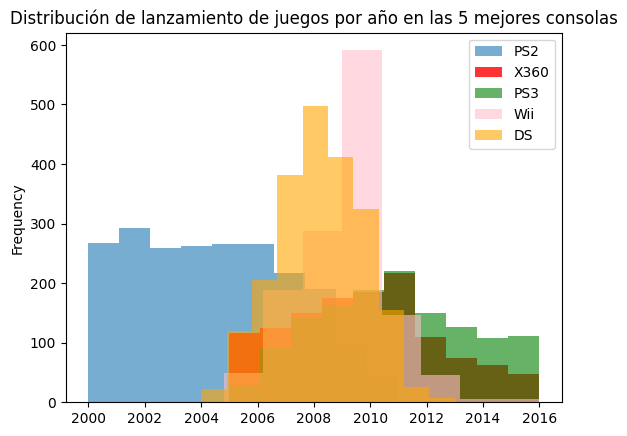

In [30]:
df_ps2 = df2[df2["platform"] == "PS2"]
df_x360 = df2[df2["platform"] == "X360"]
df_ps3 = df2[df2["platform"] == "PS3"]
df_wii = df2[df2["platform"] == "Wii"]
df_ds = df2[df2["platform"] == "DS"]

df_ps2["year_of_release"].plot(kind = "hist", alpha = 0.6, label = "PS2")
df_x360["year_of_release"].plot(kind = "hist", color = "red", alpha = 0.8, label = "X360")
df_ps3["year_of_release"].plot(kind = "hist", color = "green", alpha = 0.6, label = "PS3")
df_wii["year_of_release"].plot(kind = "hist", color = "pink", alpha = 0.6, label = "Wii")
df_ds["year_of_release"].plot(kind = "hist", color = "orange", alpha = 0.6, label = "DS")

plt.title("Distribución de lanzamiento de juegos por año en las 5 mejores consolas")
plt.legend()
plt.show()


Como se puede apreciar, la PS2 estuvo "reinando" un par de años sola hasta que vinieron a complementarse las otras 4 plataformas. El peak de lanzamientos lo tuvo la consola Wii entre 2009 - 2010.

De forma similar, un gráfico de caja de bigotes de las 5 plataformas nos muestra el "lifespan" de cada una de ellas. La PS2 es la que tiene mayor rango intercuartílico de ellas.

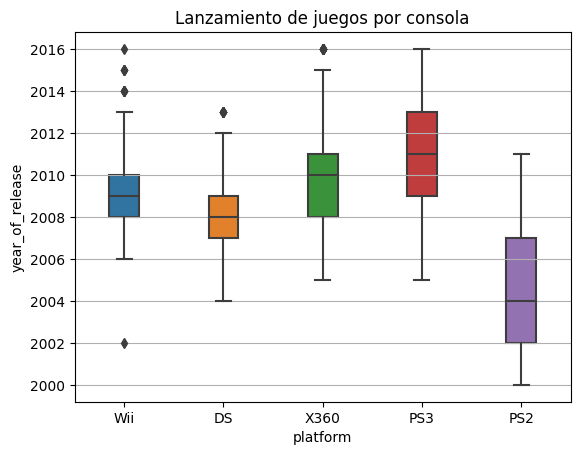

In [31]:
ax = sns.boxplot( x= "platform", y = "year_of_release", data = df2, width= 0.3)
ax.set_title("Lanzamiento de juegos por consola")
ax.yaxis.grid(True)

Ahora, si volvemos a la tabla general y vemos los lanzamientos de juegos por consola a través de los años tenemos el siguiente gráfico de caja de bigotes:

En ella, podemos apreciar como desde una solitaria Atari 2600 comenzó la era de los videojuegos por consola.

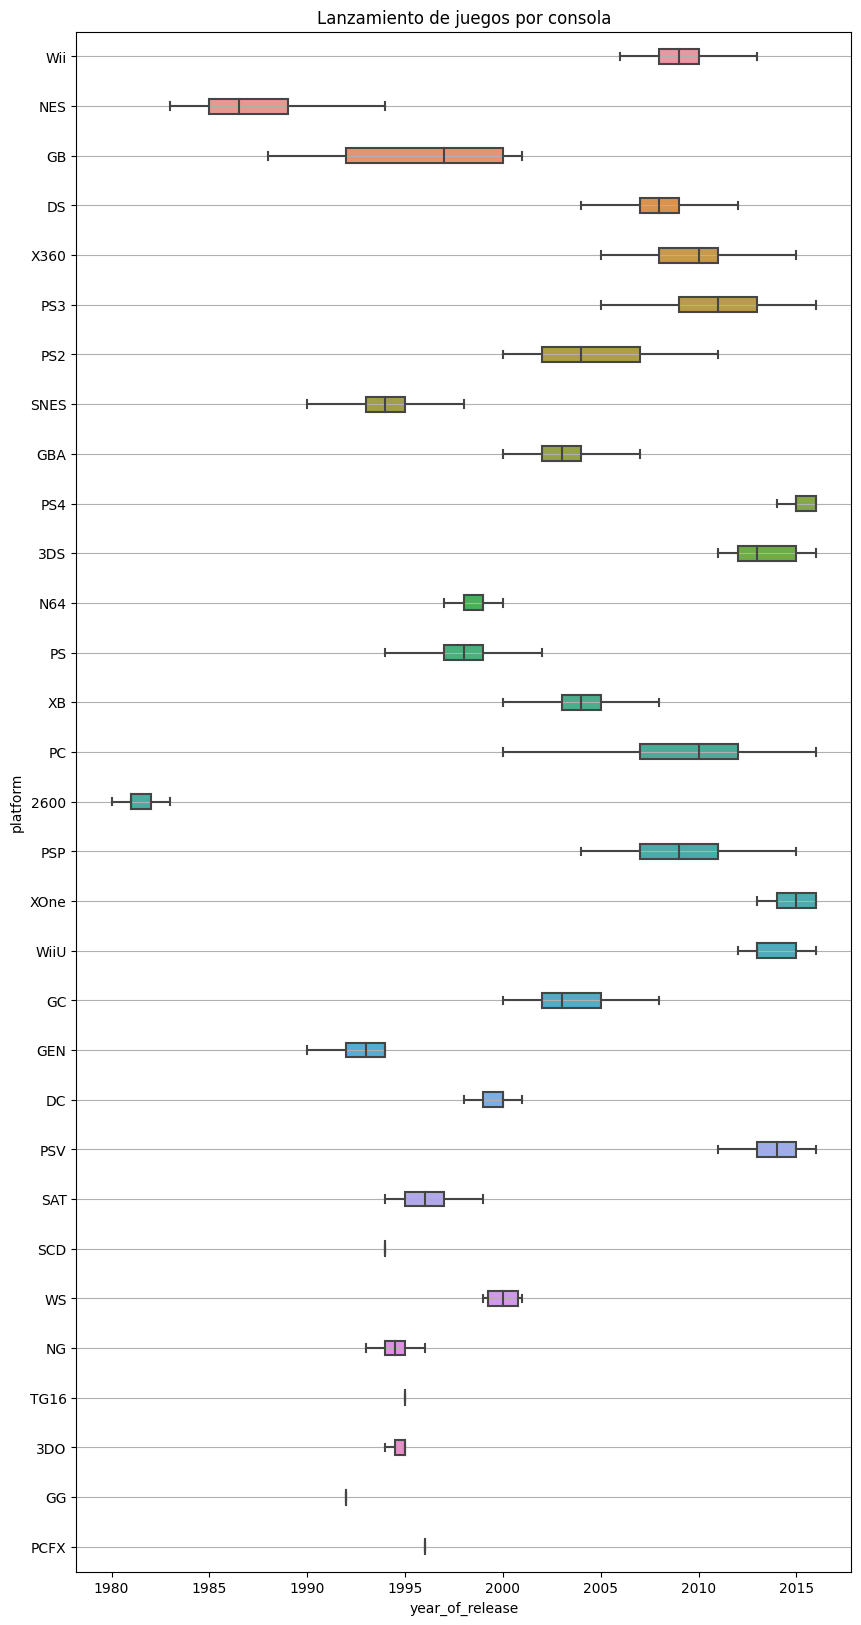

In [32]:
fig, ax2 = plt.subplots(figsize=(10, 20))
ax2 = sns.boxplot(x= "year_of_release", y = "platform", data = df, width= 0.3, orient = "h", showfliers=False)
ax2.set_title("Lanzamiento de juegos por consola")
ax2.yaxis.grid(True)

Volviendo a nuestro análisis principal, para revisar cuánto tardan las antiguas consolas en desaparecer, en pos de las nuevas, haremos un análisis de su "vida útil". Para ello, calcularemos la diferencia de su rango intercuartílico y así omitimos valores que nos obstaculicen y nos centramos donde se concentra el 50% medio de la muestra de cada una.

In [33]:
ps2_lifespan = df[df["platform"] == "PS2"]["year_of_release"]
ps2_lifespan = ps2_lifespan.quantile(.75) - ps2_lifespan.quantile(.25)
x360_lifespan = df[df["platform"] == "X360"]["year_of_release"]
x360_lifespan = x360_lifespan.quantile(.75) - x360_lifespan.quantile(.25)
ps3_lifespan = df[df["platform"] == "PS3"]["year_of_release"]
ps3_lifespan = ps3_lifespan.quantile(.75) - ps3_lifespan.quantile(.25)
wii_lifespan = df[df["platform"] == "Wii"]["year_of_release"]
wii_lifespan = wii_lifespan.quantile(.75) - wii_lifespan.quantile(.25)
ds_lifespan = df[df["platform"] == "DS"]["year_of_release"]
ds_lifespan = ds_lifespan.quantile(.75) - ds_lifespan.quantile(.25)

best_consoles_lifespan = [ps2_lifespan, x360_lifespan, ps3_lifespan, wii_lifespan, ds_lifespan]
np.mean(best_consoles_lifespan)

3.2

Con lo obtenido, para nuestras 5 mejores consolas (a nivel de ventas), su lifespan promedio es de 3.2 años y luego se van diluyendo las ventas entre las otras consolas nuevas.

### Selección de periodo de datos

Para seleccionar el periodo relevante con el cual trabajar, utilizaremos desde el año 2006 en adelante, ya que desde aquel año los lanzamientos fueron mayores a 1000 (entre 2006 - 2011).

Con lo anterior presente, efectuaremos el análisis nuevamente para visualizar que consolas tienen la mayor cantidad de ventas:

In [34]:
df3 = df.query("year_of_release > 2005") #generamos un nuevo DF filtrado con el año de 2006 en adelante.
df3.groupby("platform")["total_sales"].sum().sort_values(ascending = False)

platform
X360    962.20
PS3     939.46
Wii     907.49
DS      658.62
PS4     314.14
PS2     268.45
3DS     259.00
PSP     243.15
PC      167.16
XOne    159.32
WiiU     82.19
PSV      54.07
GC       11.95
XB       10.82
GBA       8.86
DC        0.06
Name: total_sales, dtype: float64

La mayor cantidad de ventas desde el año 2005 en adelante las tiene la consola Xbox 360 seguida muy de cerca por la PS3 y la Wii. Por otra parte, las de menores ventas en este rango de años son la Dreamcast, seguida por la GameBoy Advance y la Xbox. Parte de ello es debido a que la Dreamcast no tuvo mucho auge en occidente y la GameBoy Advance ya estaba quedando relegada a las nuevas generaciones de consolas. lo mismo para la Xbox, que ya había sido reemplazada por la Xbox 360.

Algo que llama la atención sobremanera es que para el periodo considerado, tenemos más ventas en juegos de Xbox360 y PS3, que para las consolas de mayor generación que serían XOne y PS4 respectivamente.

De nuestros datos podemos señalar que las 3 consolas más rentables son la X360, la PS3 y la Wii.

In [35]:
df3["total_sales"].sum()

5046.9400000000005

El total de ventas de todas los juegos desde el 2006 en adelante es de 5046.9 millones de dólares

### Ventas globales de juegos en periodo seleccionado

Inicialmente, verificaremos cuál de los 3 mercados es más rentable, solamente verificando sus ventas totales.

In [36]:
sales_na = df3["na_sales"].sum()
sales_eu = df3["eu_sales"].sum()
sales_jp = round(df3["jp_sales"].sum(),2)
sales_other = df3["other_sales"].sum()

print("La venta de juegos por region es:")
print(f" NA: {sales_na}, EU: {sales_eu}, JP: {sales_jp}, Otros: {sales_other}")

La venta de juegos por region es:
 NA: 2413.54, EU: 1509.43, JP: 565.78, Otros: 558.19


Con esto, observamos que el mercado norteaméricano domina en gran manera la venta de videojuegos, seguido en segundo lugar por Europa. Hay que destacar que en Japón y otras regiones juntan poseen casi el mismo valor. Sin embargo, no podemos descartar el mercado japonés, ya que sus gustos, como veremos más adelante, son variados respecto a las consolas y videojuegos vendidos. Esto, hace que su mercado sea más versátil en comparación al resto.

Para las ventas globales por consola, generamos un diagrama de caja sin los outliers ya que el gráfico quedaba muy distorsionado.

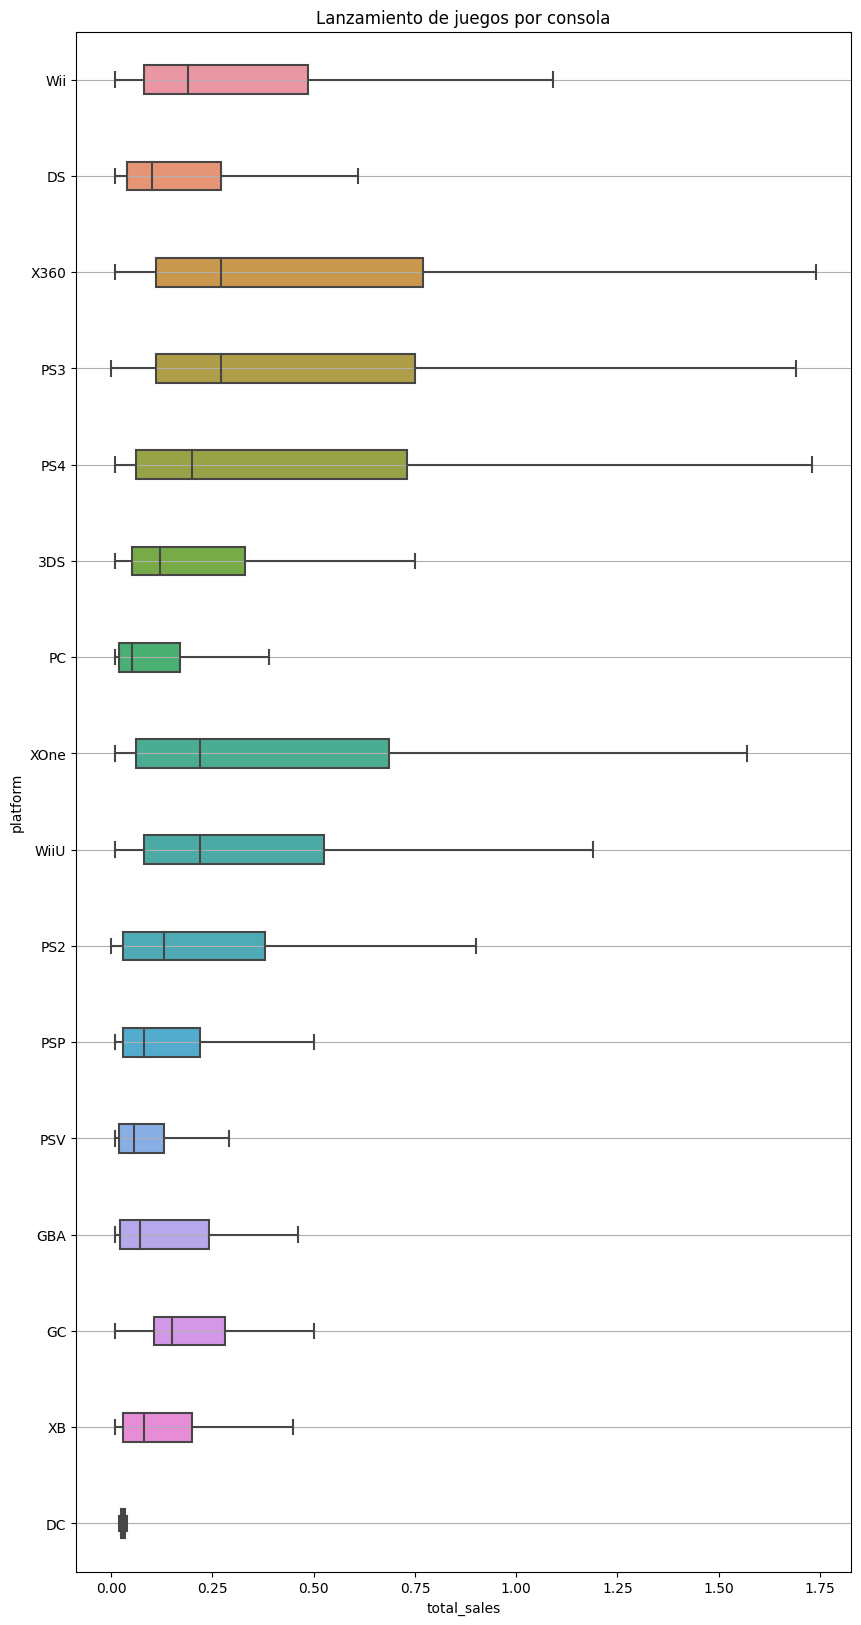

In [37]:
fig, ax3 = plt.subplots(figsize=(10, 20))
ax3 = sns.boxplot(x= "total_sales", y = "platform", data = df3, width= 0.3, orient = "h", showfliers=False)
ax3.set_title("Lanzamiento de juegos por consola")
ax3.yaxis.grid(True)

Como dato general, se aprecia  que la mayoría tiene su mediana dentro de 0.25 millones de dólares en ventas. Las únicas consolas que se escapan serían la XBOX360 y la PS3.

Las diferencias son considerablemente significativas entre una consola y otra (a excepción del top 3 ya mencionado anteriormente). Por ejemplo la diferencia entre la consola de menor ventas (DreamCast) y la de mayor (XBOX360) es de un 1603333.33%

In [38]:
df3.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,10502.000000,10502.000000,10502.000000,10502.000000,10502.000000,10502.000000,10502.000000,10502.000000
mean,2010.039135,0.229817,0.143728,0.053874,0.053151,69.750905,7.186631,0.480569
std,2.861813,0.758069,0.542683,0.241352,0.181110,9.791729,1.088176,1.541584
min,2006.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000000,71.000000,7.300000,0.050000
50%,2010.000000,0.070000,0.010000,0.000000,0.010000,71.000000,7.500000,0.140000
75%,2012.000000,0.200000,0.100000,0.030000,0.040000,71.000000,7.500000,0.410000
max,2016.000000,41.360000,28.960000,6.500000,8.450000,98.000000,9.500000,82.540000


Por otra parte, para la venta de juegos por año de lanzamiento, tenemos que el peak está en el 2008 y posterior a ello va decayendo hasta el 2016.

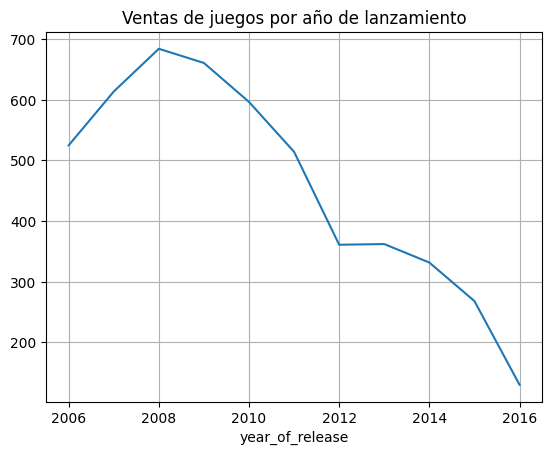

In [39]:
df3.groupby("year_of_release")["total_sales"].sum().plot(grid = True)
plt.title("Ventas de juegos por año de lanzamiento")
plt.show()

Para el promedio de ventas globales por plataforma, tenemos que sorpresivamente la media no la tiene ninguna de las primeras 3 consolas de mayor cantidad de ventas totales, sino que la posee la PS4. Hay que tener presente que los valores extremos influyen mucho dentro de la obtención de la media.

In [40]:
df3.groupby("platform")["total_sales"].mean().sort_values(ascending = False)

platform
PS4     0.801378
X360    0.775342
PS3     0.706361
Wii     0.688014
XOne    0.645020
WiiU    0.559116
3DS     0.498077
PS2     0.329791
DS      0.327835
GC      0.254255
PSP     0.221247
PC      0.211061
GBA     0.192609
XB      0.161493
PSV     0.125744
DC      0.030000
Name: total_sales, dtype: float64

### Reseñas de usuarios

Para este apartado, eligiré la plataforma PS4 netamente por gustos personales. Teniendo en cuenta la PS4, obtendremos las estadisticas de aquel dataframe donde solo esté filtrado por aquella consola.

In [41]:
df4 = df3[df3["platform"] == "PS4"]
df4.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,71.701531,7.007143,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,10.017642,1.233920,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,71.000000,6.600000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,71.000000,7.500000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,77.000000,7.500000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


Observando sus estadísticas generales, vemos que su media en critic_score es de 70.9 y por el lado user_score es de 6.8. Ambos, muy buenos números para la totalidad de sus juegos.

Para la relación entre el puntaje dado por la crítica y las ventas totales, se efectuan dos gráficos de dispersión donde se aprecia que a medida que el juego tiene mejores calificaciones, posee una mayor concentración en ventas.

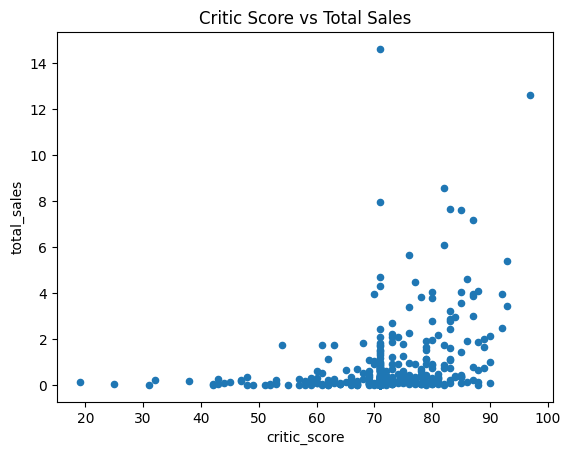

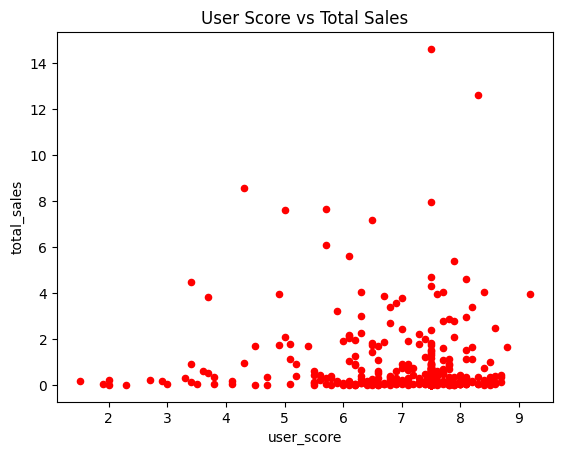

In [42]:
df4.plot(x= "critic_score", y= "total_sales", kind = "scatter", title= "Critic Score vs Total Sales")
df4.plot(x= "user_score", y= "total_sales", kind = "scatter", color = "red", title = "User Score vs Total Sales")
plt.show()

Ahora, para verificar si existe una relación entre las variables critic_score y user_score respecto de total_sales. Se calculará su correlación.

Obteniendo la matriz de correlación completa de nuestro dataframe, tenemos que la correlación de critic_score contra total_sales es de 0.34. Por otra parte, la correlación de user_score contra total_sales da -0.045.

In [43]:
df4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.024404,0.156597,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.328053,-0.051252,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.309054,-0.079833,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.250289,0.152376,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.336512,-0.066253,0.998051
critic_score,-0.024404,0.328053,0.309054,0.250289,0.336512,1.000000,0.507069,0.338706
user_score,0.156597,-0.051252,-0.079833,0.152376,-0.066253,0.507069,1.000000,-0.062756
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.338706,-0.062756,1.000000


In [44]:
user_score_corr = df4["user_score"].corr(df4["total_sales"])
critic_score_corr = df4["critic_score"].corr(df4["total_sales"])
print(f"La correlación de user_score es de: {user_score_corr}, y la de critic_score: {critic_score_corr} respecto a las ventas totales")

La correlación de user_score es de: -0.06275557891282788, y la de critic_score: 0.3387064530024634 respecto a las ventas totales


Con lo anterior, se concluye que para el user_score, la correlación es negativa, pero muy cercana a cero. Ello nos da pie a señalar que casi no existe una relación entre una variable y otra, o, por otra parte, que existe una conexión no lineal más compleja que el coeficiente no logra relacionar.

Por el lado de critic_score, tenemos que existe una correlación lineal positiva, pero no tan fuerte como se hubiese esperado.

Revisando los gráficos de dispersión de ambas variables, tenemos que efectivamente sus ventas se concentran a medida que aumenta el puntaje, pero no así aumenta las ventas de igual proporción.

Respecto de la correlación para la PS4, haré lo mismo para X360 y PS3. Para ello, generaremos dos nuevos datasets que tengan filtrada por las consolas mencionadas.

- Para PS3

In [45]:
df5 = df3[df3["platform"] == "PS3"]
df5.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,2010.823308,0.295857,0.248233,0.060286,0.101985,70.621805,6.992256,0.706361
std,2.450638,0.578750,0.589238,0.131328,0.231204,11.027934,1.239903,1.392201
min,2006.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.000000
25%,2009.000000,0.010000,0.000000,0.000000,0.010000,70.000000,6.700000,0.110000
50%,2011.000000,0.120000,0.060000,0.010000,0.030000,71.000000,7.500000,0.270000
75%,2013.000000,0.320000,0.260000,0.060000,0.110000,76.000000,7.500000,0.750000
max,2016.000000,7.020000,9.090000,1.870000,3.960000,98.000000,9.100000,21.050000


In [46]:
df5.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.144527,-0.066727,0.051195,-0.083457,0.013006,-0.023802,-0.097353
na_sales,-0.144527,1.000000,0.812608,0.341746,0.872152,0.417286,0.039955,0.936715
eu_sales,-0.066727,0.812608,1.000000,0.371445,0.974317,0.345132,0.015444,0.957895
jp_sales,0.051195,0.341746,0.371445,1.000000,0.375838,0.185589,0.127344,0.456025
other_sales,-0.083457,0.872152,0.974317,0.375838,1.000000,0.363249,0.032210,0.976457
critic_score,0.013006,0.417286,0.345132,0.185589,0.363249,1.000000,0.521699,0.397376
user_score,-0.023802,0.039955,0.015444,0.127344,0.032210,0.521699,1.000000,0.040508
total_sales,-0.097353,0.936715,0.957895,0.456025,0.976457,0.397376,0.040508,1.000000


Para la PS3, tenemos que las correlaciones de total_sales con critic_score y user_score son similares. La diferencia radica que en user_score se obtiene una correlación positiva, a diferencia que con PS4. Sin embargo, ambas son casi nulas, por lo que no se puede establecer una relación. Y para el caso de critic_score se obtiene una correlación ligeramente mayor (0.41)

- Para PS4

In [47]:
df6 = df3[df3["platform"] == "X360"]
df6.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,2009.950040,0.479283,0.217744,0.009782,0.068533,69.165995,6.869621,0.775342
std,2.390658,1.041631,0.478984,0.024601,0.143895,12.889474,1.311760,1.627695
min,2006.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.700000,0.010000
25%,2008.000000,0.080000,0.010000,0.000000,0.010000,64.000000,6.300000,0.110000
50%,2010.000000,0.170000,0.050000,0.000000,0.020000,71.000000,7.500000,0.270000
75%,2011.000000,0.450000,0.220000,0.010000,0.070000,77.000000,7.500000,0.770000
max,2016.000000,15.000000,5.140000,0.240000,1.690000,98.000000,9.000000,21.820000


In [48]:
df6.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.019254,0.033566,-0.124145,-0.012521,0.035208,-0.177643,-0.005428
na_sales,-0.019254,1.000000,0.855970,0.489104,0.964710,0.347813,0.051876,0.984507
eu_sales,0.033566,0.855970,1.000000,0.465904,0.948261,0.352689,0.059822,0.932915
jp_sales,-0.124145,0.489104,0.465904,1.000000,0.505002,0.256757,0.151263,0.509859
other_sales,-0.012521,0.964710,0.948261,0.505002,1.000000,0.369875,0.066115,0.992442
critic_score,0.035208,0.347813,0.352689,0.256757,0.369875,1.000000,0.521624,0.362946
user_score,-0.177643,0.051876,0.059822,0.151263,0.066115,0.521624,1.000000,0.058933
total_sales,-0.005428,0.984507,0.932915,0.509859,0.992442,0.362946,0.058933,1.000000


Para la XBOX 360, tenemos que las correlaciones de total_sales con critic_score y user_score son similares a las anteriores obtenidas. Aca igual obtenemos una correlación positiva en user_score, a diferencia que con PS4. Sin embargo, ambas son casi nulas, por lo que no se puede establecer una relación. Y para el caso de critic_score se obtiene una correlación ligeramente mayor (0.37)

En conclusión, las correlaciones de las 3 consolas son muy similares entre sí, lo que implica que no era un sesgo inicial de la consola seleccionada. Al parecer, sería de forma genérica.

### Distribución general de juegos por género

Continuando con el análisis, veremos ahora la distribución de juegos por genero y analizaremos sus ventas.

In [49]:
df3.groupby("genre")["total_sales"].sum().sort_values(ascending = False)

genre
Action          1136.11
Sports           799.61
Shooter          722.68
Misc             564.78
Role-Playing     524.45
Racing           300.81
Platform         280.42
Simulation       222.27
Fighting         188.68
Adventure        141.71
Puzzle            90.63
Strategy          74.79
Name: total_sales, dtype: float64

In [50]:
df3.groupby(["genre", "year_of_release"])["total_sales"].sum().sort_values(ascending = False)

genre     year_of_release
Action    2008               143.47
Sports    2009               137.72
Action    2009               137.69
Sports    2006               137.57
Action    2012               123.91
                              ...  
Strategy  2016                 1.13
          2014                 1.02
Puzzle    2013                 0.96
          2015                 0.71
          2016                 0.01
Name: total_sales, Length: 132, dtype: float64

Mirando las ventas por género tenemos que las 3 de mayores ganancias son los juegos de Acción, Deporte y los "Shooter" o juegos de disparos. Respecto a los de más bajas ventas están los de estrategia y puzzles.

De hecho, efectuando un muestreo por la suma de ventas por año respecto del genero, en los primeros 5 lugares se mantienen los juegos de Acción y Deportes, dominando de forma absoluta el mercado.

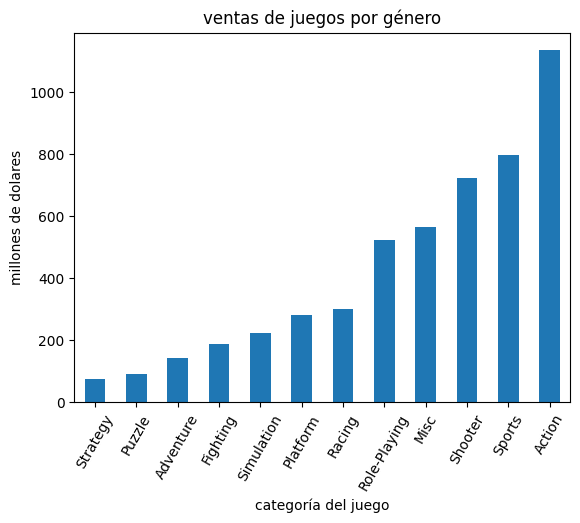

In [51]:
df3.groupby("genre")["total_sales"].sum().sort_values().plot(rot = 60, kind = "bar")
plt.title("ventas de juegos por género")
plt.ylabel("millones de dolares")
plt.xlabel("categoría del juego")
plt.show()

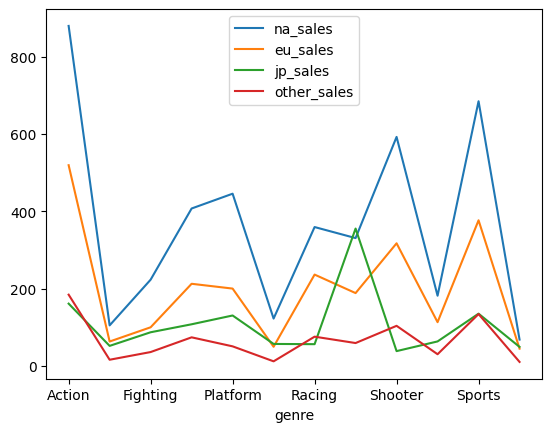

In [52]:
df.groupby("genre")["na_sales"].sum().plot()
df.groupby("genre")["eu_sales"].sum().plot()
df.groupby("genre")["jp_sales"].sum().plot()
df.groupby("genre")["other_sales"].sum().plot()

plt.legend()
plt.show()

Respecto de las ventas por región, se observa que todas tienen su peak en los juegos de acción, a excepción de las ventas en japón. Sin embargo, a nivel general las mayores ventas las tendrá, como bien se vió en los resultados anteriores, los juegos de acción, seguido por los de deportes.

## Perfiles de Usuario por Región

Para esto, en vez de utilizar el total sales, se utilizará el total de ventas por región. Es decir, para norteamérica se ocupará na_sales, para europa eu_sales y para japón jp_sales.

#### Norteamérica

Para las ventas en aquella región, tenemos que las primeras 5 plataformas son:

- X360
- Wii
- PS3
- DS
- PS2

In [53]:
df3.groupby("platform")["na_sales"].sum().sort_values(ascending = False)

platform
X360    594.79
Wii     496.90
PS3     393.49
DS      326.08
PS2     115.90
PS4     108.74
XOne     93.12
3DS      83.49
PSP      82.44
PC       45.62
WiiU     38.10
PSV      12.58
GC        8.96
XB        8.05
GBA       5.28
DC        0.00
Name: na_sales, dtype: float64

Respecto de sus géneros principales, son:

- Action 
- Sports
- Shooter
- Misc
- Role-Playing

Cabe destacar que estos eran los mismos que teníamos seleccionados en los primeros lugares para la distribución general de juegos por género. Esto se debe a que norteamérica tiene el mayor porcentaje de ventas de juegos.

In [54]:
df3.groupby("genre")["na_sales"].sum().sort_values(ascending = False)

genre
Action          540.43
Sports          400.26
Shooter         375.88
Misc            291.24
Role-Playing    200.09
Platform        134.33
Racing          133.58
Simulation      109.12
Fighting         94.49
Adventure        61.81
Puzzle           43.05
Strategy         29.26
Name: na_sales, dtype: float64

En cuanto a si sus calificaciones ESRB afectan a las ventas, tenemos que gran parte del mercado lo tiene el rating E, que significa Everyone.

In [55]:
df3.groupby("rating")["na_sales"].sum()

rating
E                   802.04
E10+                323.22
EC                    1.32
M                   577.44
RP                    0.00
T                   433.79
sin_calificacion    275.73
Name: na_sales, dtype: float64

#### Europa

Para las ventas en aquella región, tenemos que las primeras 5 plataformas son:

- PS3
- X360
- Wii
- DS
- PS4

In [56]:
df3.groupby("platform")["eu_sales"].sum().sort_values(ascending = False)

platform
PS3     330.15
X360    270.22
Wii     262.21
DS      143.47
PS4     141.09
PC      102.39
3DS      61.48
PSP      55.27
XOne     51.59
PS2      46.56
WiiU     25.13
PSV      13.12
XB        2.42
GC        2.40
GBA       1.93
DC        0.00
Name: eu_sales, dtype: float64

Respecto de sus géneros principales, son:

- Action 
- Sports
- Shooter
- Misc
- Racing

In [57]:
df3.groupby("genre")["eu_sales"].sum().sort_values(ascending = False)

genre
Action          357.09
Sports          252.72
Shooter         241.09
Misc            148.43
Racing          114.23
Role-Playing    110.85
Platform         82.10
Simulation       69.76
Fighting         42.68
Adventure        37.92
Puzzle           27.86
Strategy         24.70
Name: eu_sales, dtype: float64

En cuanto a si sus calificaciones ESRB afectan a las ventas, tenemos que parte del mercado lo tiene el rating E seguido del rating M, que significa Mature (usualmente mayor de 16 años).

In [58]:
df3.groupby("rating")["eu_sales"].sum()

rating
E                   461.81
E10+                178.42
EC                    0.00
M                   401.91
RP                    0.07
T                   239.34
sin_calificacion    227.88
Name: eu_sales, dtype: float64

#### Japón

Para las ventas en aquella región, tenemos que las primeras 5 plataformas son:

- DS
- 3DS
- PS3
- PSP
- Wii

Llama la atención que de las 5 mayores plataformas con ventas de juegos, 3 de ellas sean de consolas portátiles.

In [59]:
df3.groupby("platform")["jp_sales"].sum().sort_values(ascending = False)

platform
DS      141.97
3DS     100.67
PS3      80.18
PSP      71.53
Wii      69.31
PS2      36.87
PSV      21.91
PS4      15.96
WiiU     13.01
X360     12.14
GBA       1.51
XOne      0.34
GC        0.32
DC        0.06
PC        0.00
XB        0.00
Name: jp_sales, dtype: float64

Respecto de sus géneros principales, son:

- Role-Playing
- Action
- Misc
- Sports
- Platform

In [60]:
df3.groupby("genre")["jp_sales"].sum().sort_values(ascending = False)

genre
Role-Playing    171.64
Action          103.02
Misc             65.62
Sports           49.35
Platform         35.32
Adventure        29.55
Fighting         28.61
Simulation       23.47
Shooter          19.41
Strategy         14.09
Racing           13.27
Puzzle           12.43
Name: jp_sales, dtype: float64

En cuanto a si sus calificaciones ESRB afectan a las ventas, tenemos que la mayor parte del mercado está constituida por juegos que no poseen calificación, seguido del rating Everyone (E).

In [61]:
df3.groupby("rating")["jp_sales"].sum()

rating
E                   120.36
E10+                 36.57
EC                    0.00
M                    44.45
RP                    0.00
T                    84.22
sin_calificacion    280.18
Name: jp_sales, dtype: float64

### Conclusiones

Habiendo revisado los datos de las tres regiones a nivel de ventas, notamos que las plataformas principales de juego si difieren de una región a otra. Por ejemplo en norteamérica y europa se tiene que de las 5 plataformas, 4 de ellas no son portátiles, pero en Japón ocurre lo opuesto habiendo mayoría en las consolas portátiles (3 de 5).

En cuanto a sus géneros principales, norteamérica y europa nuevamente se comportan de forma similar, teniendo ambos en 4 de 5, coincidencias exactas. Para Japón es diferente, su mercado (como vimos en el parrafo anterior) está dominado por las consolas portátiles y por elo, es que su juego principal es el Role-Playing. Aun así, el resto de categorías comparten generos con las otras dos regiones, teniendo un match en 3 de 5.

Finalmente, respecto de las clasificaciones ESRB, tenemos una dominación en la categoría Everyone, donde se lleva el primer lugar en norteamérica y europa. Para Japón la situación es algo diferente ya que ahí tenemos la mayoría de juegos sin una categoría específica. Sin embargo, acorde a las situaciones verificadas previamente, podemos suponer que el mercado japonés se rige a si mismo por los gustos de su cultura y por ende las calificaciones que tenga no inferirán en las ventas. 

Para norteamérica y europa si se ve claramente una tendencia a tener mayores ventas para los juegos de categoría everyone (E) por lo que aquello puede ser una tendencia de éxito a la hora de publicar juegos que califiquen dentro de ella.

## Pruebas de Hipótesis

Para las pruebas de hipótesis lo primero que haremos será filtrar nuestro dataset por los requerimientos que nos solicitan, posteriormente haremos un pequeño análisis con la función levene (que compara si sus varianzas son efectivamente son iguales) para finalmente culminar con la prueba en sí.

### Usuarios Xbox One y PC

Prueba para verificar si las calificaciones promedio de los usuarios de Xbox One y PC son iguales.

Comenzaremos filtrando nuestros dataset por aquellas plataformas.

In [62]:
xbox_one = df3[df3["platform"] == "XOne"]

pc = df3[df3["platform"] == "PC"]

Ahora, con nuestros dataset filtrados, haremos las siguientes hipótesis:

- Ho: Las calificaciones promedio de usuarios de Xbox One y PC son iguales
- H1: Las calificaciones promedio de usuarios de Xbox One y PC son diferentes

Seguido de esto, utilizaremos la función levene, con tal de poder establecer el valor de equal_var en nuestra prueba. Para este test, utilizaremos un valor alpha de 0.05.

In [63]:
result_var = st.levene(xbox_one["user_score"], pc["user_score"])
print(result_var.pvalue)

alpha = 0.05

if result_var.pvalue < alpha: # comparar el valor p con el umbral seleccionado de 0.05
    print("Rechazamos la hipótesis nula de la funcion levene")
else:
    print("No podemos rechazar la hipótesis nula de la funcion levene")

0.6762974626816225
No podemos rechazar la hipótesis nula de la funcion levene


Con el valor obtenido, no podemos rechazar la hipotesis nula de la función levene, por ende dejaremos el parámetro equal_var en true para nuestra prueba.

Efectuando una pequeña prueba previa a nuestro test, veremos cómo son las varianzas de ambos datos:

In [64]:
var_xbox = xbox_one["user_score"].var()
var_pc = pc["user_score"].var()
print(f"la varianza de los usuarios de Xbox es: {var_xbox}")
print(f"la varianza de los usuarios de PC es: {var_pc}")

la varianza de los usuarios de Xbox es: 1.5895549850235344
la varianza de los usuarios de PC es: 1.9061072801338288


In [65]:
#escogemos el ttest para dos muestras
results = st.ttest_ind(xbox_one["user_score"], pc["user_score"], equal_var = "True")

print("valor p: ", results.pvalue) # extraemos el valor p

#utilizamos el valor de alpha ya seleccionado previamente.

if results.pvalue < alpha: # comparar el valor p con el umbral seleccionado de 0.05
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  0.054944523775005964
No podemos rechazar la hipótesis nula


El valor p nos indica que aunque las cantidades promedio para los dos ingresos son bastante cercanas entre sí, existe un porcentaje bajo de probabilidad de obtener una diferencia de ese tamaño o mayor, con lo que se puede rechazar la hipótesis nula. Existe una diferencia significativa entre los medias de cada usuario de plataforma.

### Calificaciones promedio géneros Acción y Deportes

Tal como se efectuó en el apartado anterior, se realizará una prueba nuevamente para estas dos nuevas categorías en nuestro dataset.

Primeramente, seleccionamos el dataset para aquellos géneros:

In [66]:
action = df3[df3["genre"] == "Action"]
sports = df3[df3["genre"] == "Sports"]

Con ello, haremos una prueba inicial revisando sus varianzas:

In [67]:
action_var = action["user_score"].var()
sports_var = sports["user_score"].var()
print(f"la varianza del género de acción es: {action_var}")
print(f"la varianza del género de deporte es: {sports_var}")

la varianza del género de acción es: 1.1252731478846576
la varianza del género de deporte es: 1.732491331648225


Ahora, con nuestros dataset filtrados, haremos las siguientes hipótesis:

- Ho: Las calificaciones promedio del género acción y deporte son iguales
- H1: Las calificaciones promedio del género acción y deporte son diferentes

Seguido de esto, utilizaremos la función levene, con tal de poder establecer el valor de equal_var en nuestra prueba. Para este test, utilizaremos un valor alpha de 0.01.

In [68]:
result_var2 = st.levene(action["user_score"], sports["user_score"])
print(result_var2.pvalue)

alpha2 = 0.01

if result_var2.pvalue < alpha2: # comparar el valor p con el umbral seleccionado de 0.01
    print("Rechazamos la hipótesis nula de la funcion levene")
else:
    print("No podemos rechazar la hipótesis nula de la funcion levene")

1.2115239185697207e-05
Rechazamos la hipótesis nula de la funcion levene


Con la hipótesis rechazada, no podemos sostener que ambas varianzas son iguales, por lo que estableceremos el parámetro equal_var como False en nuestra prueba.

In [69]:
#escogemos el ttest para dos muestras nuevamente

results2 = st.ttest_ind(action["user_score"], sports["user_score"], equal_var = "False")

print("valor p: ", results2.pvalue) # extraemos el valor p

#utilizamos el valor de alpha ya seleccionado previamente.

if results2.pvalue < alpha2: # comparar el valor p con el umbral seleccionado de 0.01
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  1.1099369438783001e-08
Rechazamos la hipótesis nula


El valor p nos indica que existe un porcentaje extremadamente pequeño de probabilidad de obtener una diferencia de ese tamaño o mayor, con lo que se puede rechazar la hipótesis nula. Por lo tanto, existe una diferencia significativa entre las medias de cada género seleccionado respecto a la calificación de los usuarios.

Para ambas pruebas se ha utilizado la funcion ttest, que está basada en la distribución t-student. Esta nos permite comparar dos poblaciones respecto de sus medias, por lo que es ideal para este tipo de muestreos.

La función levene nos ayuda a revisar aquellas varianzas de ambas muestras, ya que la función ttest requiere aquel parámetro, siempre es mejor comprobar que lo que se añade esté verificado para no tener errores.

## Conclusiones Generales

Habiendo revisado en la totalidad los datos del dataset de juegos vendidos en todas las regiones, indudablemente debemos señalar que el mercado que más vende es el norteamericano. Este, como ya vimos previamente, tiene sus géneros de juegos ya consolidados (como los juegos de acción y deportes) y con ello, por ejemplo, si quisieramos dedicarnos a obtener mayores ganancias de ventas de videojuegos, deberíamos conseguir juegos de esas categorías y distribuir, mayoritariamente en aquel mercado.

El mercado europeo se comporta de manera similar por lo que de igual manera es una muy buena opción viendo sus ventas. 

Respecto al mercado Japonés, la particularidad que tiene, es que sus consolas y videojuegos difieren de las de las otras regiones (que como ya comprobamos tienden a tener cierta semejanza). En Japón la gente suele utilizar consolas portátiles y jugar juegos de otro género en comparación a las otras regiones. Esto, hace que a nivel general el mercado tenga sus nichos de clientes por lo que dependiendo de la categoría de videojuegos a vender, sea necesario establecer aquella estrategia.

En cuanto a la venta de juegos por consola, es necesario saber que el mercado constantemente está mejorando la cálidad gráfica y la inmersión, por lo que las consolas van quedando obsoletas respecto a sus características técnicas. Esto, sumado al desarrollo normal de los videojuegos, dan que la vida útil de cada consola esté determinado (con nuestro análisis en promedio cada 3 años aproximadamente).

Nuestro análisis determino que el mercado no se deja llevar necesariamente por las calificaciones dadas a los videojuegos, sino que por sus categorías y plataformas. No logramos encontrar una relación fuerte en la calificación del juego y sus ventas, aunque la mayoría de los juegos vendidos estén bien calificados. Con esto, finalmente podemos señalar que los compradores quieren jugar a los juegos por lo que son y no por su calificación. 


Finalmente, las medias de las poblaciones observadas nos dieron que usualmente serían diferentes, por lo que cada plataforma se comportaría de forma "única" respecto a lo mismo.